# Assignment 07
## Addison Flack
### Assignment 06 Extension - Everything until "ASSIGNMENT 07" is just assignment 06 (loading data, performing analysis, calculations, etc...)

### Step 1: Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import arcpy

from arcgis.gis import GIS
from arcgis.features import GeoAccessor, GeoSeriesAccessor

Setting the Working Directory:

In [2]:
arcpy.env.workspace=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06"
arcpy.env.overwriteOutput = True

Making sure that Matplotlib will show the plots in the correct spots:

In [3]:
%matplotlib inline

In [4]:
gis = GIS()

### Step 2 - Reading and Exploring the Data

Examining the available feature classes for this set:

In [5]:
fcs = arcpy.ListFeatureClasses()
print(fcs)

['Buildings.shp', 'Buildings_1.shp', 'building_boundary.shp', 'Corporate_Limits.shp', 'Edge_of_Pavement.shp', 'Neighborhoods.shp', 'Sidewalks.shp']


Beginning to explore the Corporate Limits Shapefile below:

In [6]:
corp = pd.DataFrame.spatial.from_featureclass('Corporate_Limits')
corp.head()
print('The area of the Town of Blacksburg is', corp['Shape_area'].sum(), 'square feet')

The area of the Town of Blacksburg is 552311533.191 square feet


This above format uses the plain 'Shape_area' field, part of the inherent geometry of the dataset - While this works, it also changes units based on the projection of the data, meaning it is not the safest or most permanent method.

A Better method would be to use the equivalent of 'Calculate Geometry' in ArcGIS Pro.


arcpy.management.AddField("schools", "ref_ID", "LONG", 9, "", "", "refcode", 
                          "NULLABLE", "REQUIRED")"

"arcpy.management.CalculateGeometryAttributes(in_features, geometry_property, {length_unit}, {area_unit}, {coordinate_system}, {coordinate_format})"

In [7]:
corpstr = 'Corporate_Limits.shp'

In [8]:
corp1 = arcpy.management.AddField(corpstr, "Area_Sqm", "DOUBLE")

In [9]:
corp2 = arcpy.management.CalculateGeometryAttributes(corp1,[["Area_Sqm","AREA_GEODESIC"]],"","SQUARE_METERS")

In [10]:
corp = pd.DataFrame.spatial.from_featureclass('Corporate_Limits.shp')
corp

,FID,GlobalID,Acres,Square_Mil,Shape_area,Shape_len,Area_SqKm,Area_Sqm,SHAPE
0,0,{35B608C7-6E98-4555-8C52-E98C3E837FF2},12656.2503576954,19.7753911864646,5.523115e+08,166084.609984,0.0,5.131693e+07,"{""rings"": [[[10914166.430661365, 3602228.16961..."


Repeating below for buildings:

In [11]:
buildstr = 'Buildings.shp'

In [12]:
build1 = arcpy.management.AddField(buildstr, "Area_Sqm", "DOUBLE")

In [13]:
build2 = arcpy.management.CalculateGeometryAttributes(build1,[["Area_Sqm","AREA_GEODESIC"]],"","SQUARE_METERS")

In [14]:
build = pd.DataFrame.spatial.from_featureclass(buildstr)
build.head()

,FID,TYPE,STNUM,STREET_PRE,STREET_NAM,STREET_TYP,STREET_SUF,LOT_APT,COMMUNITY,COMMON_NAM,...,DATA_SOURC,BLDG_NUM,CO_DATE,NEIGHBORHO,GlobalID,BLDG_ID,Shape_area,Shape_len,Area_Sqm,SHAPE
0,0,Corrected,0.0,,HIGHLAND,CIR,,,BLACKSBURG,,...,Blacksburg,,,GRISSOM/HIGHLAND,{6E450183-9999-4CEB-AD03-BE4F8E072208},1,613.068476,99.072793,56.962019,"{""rings"": [[[10932902.729474768, 3610652.26103..."
1,1,Corrected,209.0,,HEARTWOOD,XING,,,BLACKSBURG,,...,Blacksburg,,,MAIN/PATRICK HENRY,{BD785FB6-9480-43C1-88B4-EE258C1DDB18},2,1516.727063,170.788011,140.923976,"{""rings"": [[[10927818.343646199, 3622856.58307..."
2,2,Corrected,817.0,,DAVIS,ST,,STE 1,BLACKSBURG,NINA TEMPLETON MD,...,Blacksburg,,,FARMVIEW/RAMBLE,{1980797A-D612-4E27-ADEA-03EC3D42F015},3,6914.543067,432.476118,642.448482,"{""rings"": [[[10925422.688660607, 3597193.72069..."
3,3,Corrected,0.0,,MAYWOOD,ST,,,BLACKSBURG,,...,Blacksburg,,,WOODBINE/WYATT,{922CF6A0-DC03-47CA-A9E0-B1E7547DB231},4,119.845643,45.963462,11.135250,"{""rings"": [[[10925680.519181699, 3626058.29189..."
4,4,Corrected,3010.0,,LANCASTER,DR,,,BLACKSBURG,,...,Blacksburg,,,HETHWOOD/PRICES FORK,{4F05B684-C85A-41A0-ADFF-003F3CFADD58},5,2869.049440,246.291952,266.571531,"{""rings"": [[[10913398.27635777, 3605119.399721..."


And for Pavement:

In [15]:
pavestr = 'Edge_of_Pavement.shp'
pave1 = arcpy.management.AddField(pavestr, "Area_Sqm", "DOUBLE")
pave2 = arcpy.management.CalculateGeometryAttributes(pave1,[["Area_Sqm","AREA_GEODESIC"]],"","SQUARE_METERS")
pave = pd.DataFrame.spatial.from_featureclass(pavestr)
pave.head()

,FID,OBJECTID,TYPE,Shape_Leng,Shape_area,Shape_len,Area_Sqm,SHAPE
0,0,3,Roads Paved,91.905396,208.480285,91.905396,19.370456,"{""rings"": [[[10930258.597952023, 3596137.03678..."
1,1,4,Roads Paved,2078.719622,12576.923995,2078.719622,1168.554445,"{""rings"": [[[10929898.790928856, 3596473.39207..."
2,2,5,Roads Paved,2234.187158,26141.508713,2234.187158,2428.876984,"{""rings"": [[[10928777.741005614, 3597185.89393..."
3,3,6,Roads Paved,4490.588317,61011.794040,4490.588317,5668.760752,"{""rings"": [[[10925858.111674279, 3598233.25109..."
4,4,7,Roads Paved,144.267616,188.536371,144.267616,17.517438,"{""rings"": [[[10915382.558478445, 3602717.06167..."


And for Sidewalks:

In [16]:
sidestr = 'Sidewalks.shp'
side1 = arcpy.management.AddField(sidestr, "Area_Sqm", "DOUBLE")
side2 = arcpy.management.CalculateGeometryAttributes(side1,[["Area_Sqm","AREA_GEODESIC"]],"","SQUARE_METERS")
side = pd.DataFrame.spatial.from_featureclass(sidestr)
side.head()

,FID,OBJECTID,TYPE,Assessment,Shape_Leng,Shape_area,Shape_len,Area_Sqm,SHAPE
0,0,2,Sidewalk,,100.020988,113.805080,100.020988,10.573932,"{""rings"": [[[10930961.939065024, 3596399.09301..."
1,1,3,Sidewalk,,238.104543,439.455531,238.104543,40.830929,"{""rings"": [[[10929806.781598449, 3596468.35304..."
2,2,4,Sidewalk,,262.450639,442.927847,262.450639,41.153584,"{""rings"": [[[10929966.827866271, 3596491.28279..."
3,3,6,Sidewalk,,68.664887,172.361667,68.664887,16.014576,"{""rings"": [[[10929946.211765781, 3596519.85097..."
4,4,7,Sidewalk,,81.241412,107.058688,81.241412,9.947103,"{""rings"": [[[10931112.286861435, 3596564.64648..."


## Question 1:

#### Using layers from the Town of Blacksburg's GIS Data Links to an external site. and using ArcPy, write a script to calculate and report what percent of the town's Links to an external site. land area (in square meters) is occupied by: A) Building footprints B) Pavement C) Sidewalks

### Total Areas:

In [17]:
total_area = corp['Area_Sqm'].sum()
building_area = build['Area_Sqm'].sum()
pavement_area = pave['Area_Sqm'].sum()
sidewalk_area = side['Area_Sqm'].sum()


print('The total area of Blacksburg is',corp['Area_Sqm'].sum(),'Square Meters')
print('The total area of Buildings in Blacksburg is',build['Area_Sqm'].sum(),'Square Meters')
print('The total area of Pavement is',pave['Area_Sqm'].sum(),'Square Meters')
print('The total area of Sidewalks in Blacksburg is',side['Area_Sqm'].sum(),'Square Meters')

The total area of Blacksburg is 51316930.5756 Square Meters
The total area of Buildings in Blacksburg is 2338909.655201193 Square Meters
The total area of Pavement is 6094091.2901809085 Square Meters
The total area of Sidewalks in Blacksburg is 884945.3633374954 Square Meters


# Question 1 (Answer)
### Percentages:

In [18]:
building_pct = building_area/total_area *100
pavement_pct = pavement_area/total_area *100
sidewalk_pct = sidewalk_area/total_area *100

print('The percentage of buildings is:', round(building_pct,2),'%')
print('The percentage of pavement is:', round(pavement_pct,2),'%')
print('The percentage of sidewalks is:', round(sidewalk_pct,2),'%')

The percentage of buildings is: 4.56 %
The percentage of pavement is: 11.88 %
The percentage of sidewalks is: 1.72 %


### Onto Question 2:

I wanted to begin this question by creating a pandas dataframe table which would house the areas, and could also be the space for the calculations necessary.

In [19]:
d = {'feature_type': ['building','pavement','sidewalk'], 'Area_Sqm': [building_area,pavement_area,sidewalk_area]}

df = pd.DataFrame(data=d)
df.head()

,feature_type,Area_Sqm
0,building,2.338910e+06
1,pavement,6.094091e+06
2,sidewalk,8.849454e+05


Next, we need to create a new column with the 'normalized' area values, and apply an equation to that column.

In [20]:
#normalized = (value/minimum)
build_normed = building_area/sidewalk_area
print('Building Normalized:',build_normed)
pave_normed = pavement_area/sidewalk_area
print('Pavement Normalized:',pave_normed)
side_normed = sidewalk_area/sidewalk_area
print('Sidewalkside_normed:',side_normed)


normed = [build_normed,pave_normed,side_normed]
df['normalized_area']= normed
df.head()

Building Normalized: 2.6429989376747467
Pavement Normalized: 6.886404000352708
Sidewalkside_normed: 1.0


,feature_type,Area_Sqm,normalized_area
0,building,2.338910e+06,2.642999
1,pavement,6.094091e+06,6.886404
2,sidewalk,8.849454e+05,1.000000


Now, onto plotting this data:

# Question 2 (Answer)

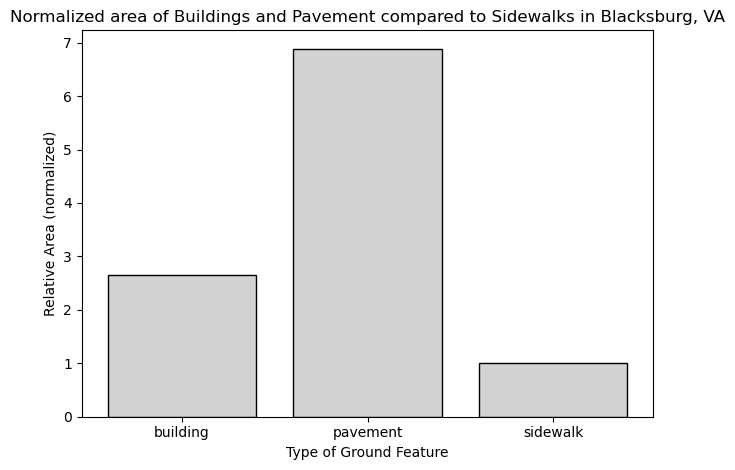

In [21]:
_ = plt.bar(df['feature_type'],df['normalized_area'],color='lightgrey',ec='k')
plt.title('Normalized area of Buildings and Pavement compared to Sidewalks in Blacksburg, VA')
plt.xlabel('Type of Ground Feature')
plt.ylabel('Relative Area (normalized)')
plt.tight_layout()
plt.show()

### Onto Question 3:

First, we have to make the convex hull (minimum bounding geometry) of the Building shapefile layer.

This will give us a better estimate of the area percentages, as Virginia Tech's area is included in the Blacksburg area shapefile, but the buildings are not included - a minimum bounding geometry will thus get rid of some of the areas where buildings *should* be in the shapefile.

In [22]:
arcpy.MinimumBoundingGeometry_management("buildings.shp","building_boundary","CONVEX_HULL", "ALL")

<Result 'C:\\Users\\Addison F\\Desktop\\Programming for GIS\\Assignments\\Assignment06\\building_boundary.shp'>

Above, I use the following in my code:
* Input: Buildings
* Output: building_boundary (the new shapefile I am creating)
* Geometry Type: Convex Hull (as this is what we have specified in the assignment)
* Group Type: All - We want the group type to be all, so that all of the polygons are treated as one group - meaning that the boundary will be around all of the polygons taken together, rather than one boundary per each building.


In [23]:
bound_df = pd.DataFrame.spatial.from_featureclass('building_boundary')
boundstr = 'building_boundary.shp'
bound1 = arcpy.management.AddField(boundstr, "Area_Sqm", "DOUBLE")
bound2 = arcpy.management.CalculateGeometryAttributes(bound1,[["Area_Sqm","AREA_GEODESIC"]],"","SQUARE_METERS")
bound = pd.DataFrame.spatial.from_featureclass(boundstr)
bound.head()

,FID,Id,Area_Sqm,SHAPE
0,0,0,5.828328e+07,"{""rings"": [[[10930284.855445445, 3596225.38666..."


To check to see if this worked correctly, I compared the area of the corporate limits, with the area of the new boundary.

In [24]:
total_area = corp['Area_Sqm'].sum()
bound_area = bound['Area_Sqm'].sum()

print("The total area of Blacksburg (corporate limits) is",total_area,"square meters")
print("The total area of the Minimum Boundary Polygon (Convex Hull) of Blacksburg's Buildings is",bound_area,"square meters")

The total area of Blacksburg (corporate limits) is 51316930.5756 square meters
The total area of the Minimum Boundary Polygon (Convex Hull) of Blacksburg's Buildings is 58283282.8456 square meters


#### I was expecting to see that the convex hull would end up being smaller than Blacksburg's corporate limits - however, it is larger in area. Even when I bring it into ArcGIS Pro (as well as created another shapefile just to test), it is indeed larger than the coporate limits of Blacksburg.

Now, time to calculate the percentages of the areas of buildings, pavement, and sidewalks once more.

# Question 3 (Answer)

In [25]:
building_pct2 = building_area/bound_area *100
pavement_pct2 = pavement_area/bound_area *100
sidewalk_pct2 = sidewalk_area/bound_area *100

print('The percentage of buildings is:', round(building_pct2,2),'%')
print('The percentage of pavement is:', round(pavement_pct2,2),'%')
print('The percentage of sidewalks is:', round(sidewalk_pct2,2),'%')

The percentage of buildings is: 4.01 %
The percentage of pavement is: 10.46 %
The percentage of sidewalks is: 1.52 %


As expected, the percentages all experienced a slight decrease, as the area increased marginally.

# ASSIGNMENT 07
## Adding Demographics and Neighborhoods into the analysis.


I will begin here by adding the Neighborhood data to the project:


In [26]:
neighstr = 'Neighborhoods.shp'
neigh1 = arcpy.management.AddField(neighstr, "Area_Sqm", "DOUBLE")
neigh2 = arcpy.management.CalculateGeometryAttributes(neigh1,[["Area_Sqm","AREA_GEODESIC"]],"","SQUARE_METERS")
neigh = pd.DataFrame.spatial.from_featureclass(neighstr)
neigh.head(3)

,FID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,Shape_area,Shape_len,...,populati_1,nonhispa_1,Shape_Le_1,Shape_Ar_2,ACAD_TEX_4,ZONE_COD_1,COUNT_1,AREA_1,MEAN_1,SHAPE
0,0,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.391921e+07,32857.915642,...,2.191,87.55,32857.915642,3.391921e+07,Northend,1,3505.0,3154500.0,7.934904,"{""rings"": [[[10930174.00002411, 3626244.749859..."
1,1,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.804863e+07,17850.668822,...,2.191,84.86,17850.668822,1.804863e+07,Northside Park,2,1863.0,1676700.0,5.353620,"{""rings"": [[[10925379.000099689, 3626181.74998..."
2,2,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.149959e+08,74639.468148,...,2.191,88.52,74639.468148,1.149959e+08,Tom's Creek,3,11866.0,10679400.0,7.259095,"{""rings"": [[[10919218.999952525, 3624748.24989..."


Above, I also created and calculated an Area_Sqm field - the area of each neighborhood, in square meters. This will be helpful to determine the percentages of the surfaces, as the areas of the surfaces are also in square meters.

Since we are working with neighborhoods, and have multiple neighborhoods in the shapefile, we will need to add one column/field for each surface, into the shapefile to calculate the percentage of the surfaces.

In [27]:
arcpy.management.AddField(neighstr, "Build_Pct", "DOUBLE")
arcpy.management.AddField(neighstr, "Pave_Pct", "DOUBLE")
arcpy.management.AddField(neighstr, "Side_Pct", "DOUBLE")

<Result 'Neighborhoods.shp'>

In [28]:
neigh = pd.DataFrame.spatial.from_featureclass(neighstr)
neigh.head(3)

,FID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,Shape_area,Shape_len,...,populati_1,nonhispa_1,Shape_Le_1,Shape_Ar_2,ACAD_TEX_4,ZONE_COD_1,COUNT_1,AREA_1,MEAN_1,SHAPE
0,0,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.391921e+07,32857.915642,...,2.191,87.55,32857.915642,3.391921e+07,Northend,1,3505.0,3154500.0,7.934904,"{""rings"": [[[10930174.00002411, 3626244.749859..."
1,1,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.804863e+07,17850.668822,...,2.191,84.86,17850.668822,1.804863e+07,Northside Park,2,1863.0,1676700.0,5.353620,"{""rings"": [[[10925379.000099689, 3626181.74998..."
2,2,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.149959e+08,74639.468148,...,2.191,88.52,74639.468148,1.149959e+08,Tom's Creek,3,11866.0,10679400.0,7.259095,"{""rings"": [[[10919218.999952525, 3624748.24989..."


### Adding in data of my choosing - 
#### For each neighborhood, have each of the following:
* Proportion of sidewalks, buildings, and pavement in EACH neighborhood.
* At least one additional variable: Median income, Elevation, Slope?

#### To do so, consider the following:
* TIGER/Line Shapefiles
* Pycnophylactic Reallocation - in which a smoothed 'density' surface is created from the polygon data. (tobler.pycno.pycno_interpolate)
* The new tool, "Enrich".

#### For my variable of analysis, I chose to look at 2 variables - Percentage of White (non-Hispanic) population, and Slope. I believe that neighborhoods with a higher white population will likely live in either more gentrified, or more rural areas. Honestly, I expect to see more sidewalk percentage, but maybe less buildings/less pavement. 

#### For slope, I believe that neighborhoods with higher slopes will be more difficult to develop (both historically and in the future) - and thus will have much lower building, sidewalk, and road percentages than neighborhoods with more flat slopes.

To add the non-white percentage data, I do the following (below) using the Enrich tool:

In [29]:
arcpy.analysis.Enrich("Neighborhoods", r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich", "nonhispanicorigin.whtnhisp10_p", '', 1, '')

<Result 'C:\\Users\\Addison F\\Desktop\\Programming for GIS\\Assignments\\Assignment06\\Flack_Assignment06.gdb\\Neighborhoods_Enrich'>

#### Joining the "Enrich" table back into the data looks like this:

In [30]:
arcpy.management.JoinField("Neighborhoods", "ACAD_TEXT", r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich", "ACAD_TEXT", None, "USE_FM", r'Blacksburg "Blacksburg" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Blacksburg,-1,-1;PERIMETER "PERIMETER" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,PERIMETER,-1,-1;HOODS_ "HOODS_" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,HOODS_,-1,-1;HOODS_ID "HOODS_ID" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,HOODS_ID,-1,-1;ACAD_TEXT "ACAD_TEXT" true true false 75 Text 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,ACAD_TEXT,0,75;AreaRatio "AreaRatio" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,AreaRatio,-1,-1;Real_ID "Real_ID" true true false 4 Long 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Real_ID,-1,-1;Area_Sqm "Area_Sqm" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Area_Sqm,-1,-1;Build_Pct "Build_Pct" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Build_Pct,-1,-1;Pave_Pct "Pave_Pct" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Pave_Pct,-1,-1;Side_Pct "Side_Pct" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Side_Pct,-1,-1;aggregationMethod "aggregationMethod" true true false 256 Text 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,aggregationMethod,0,256;HasData "HasData" true true false 4 Long 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,HasData,-1,-1;ORIGINAL_OID "ORIGINAL_OID" true true false 4 Long 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,ORIGINAL_OID,-1,-1;sourceCountry "sourceCountry" true true false 256 Text 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,sourceCountry,0,256;apportionmentConfidence "apportionmentConfidence" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,apportionmentConfidence,-1,-1;populationToPolygonSizeRating "populationToPolygonSizeRating" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,populationToPolygonSizeRating,-1,-1;nonhispanicorigin_whtnhisp10_p "2010 White Non-Hispanic Pop: Percent" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,nonhispanicorigin_whtnhisp10_p,-1,-1;Shape_Length "Shape_Length" false true true 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Shape_Length,-1,-1;Shape_Area "Shape_Area" false true true 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\Neighborhoods_Enrich,Shape_Area,-1,-1')

<Result 'C:\\Users\\Addison F\\Desktop\\Programming for GIS\\Assignments\\Assignment06\\Neighborhoods'>

#### Adding the slope was slightly more difficult - I had to download an elevation file (30m) from Geospatial Data Gateway, and then convert it to a slope, using the following code:

In [31]:
out_raster = arcpy.sa.Slope("elevation.tif", "DEGREE", 1, "PLANAR", "METER"); out_raster.save(r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\slope.tif")

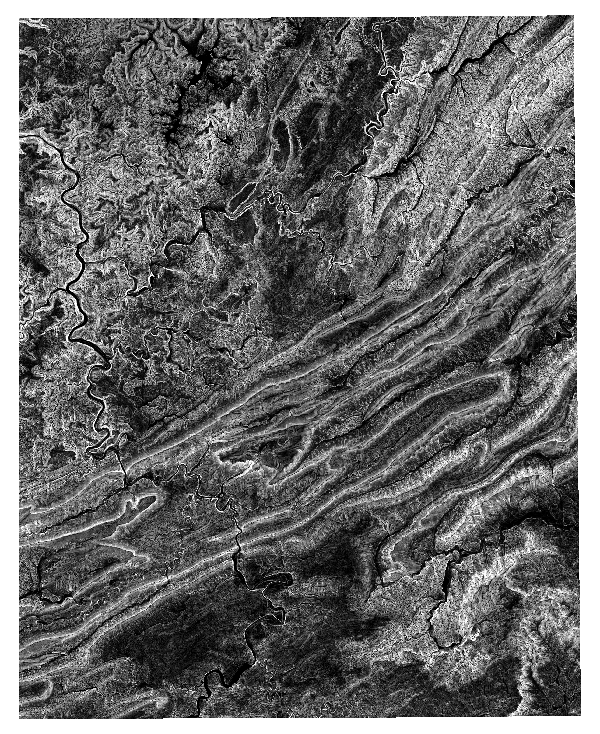

In [32]:
out_raster

#### From here, I need to use "Zonal Statistics as Table" to move from a slope raster, to summarizing the slope values within each neighborhood.

In [33]:
arcpy.sa.ZonalStatisticsAsTable("Neighborhoods", "ACAD_TEXT", r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\slope.tif", r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\ZonalStats", "DATA", "MEAN", "CURRENT_SLICE", 90, "AUTO_DETECT", "ARITHMETIC", 360)

<geoprocessing server result object at 0x18d03165600>

#### Now, we have to join the Zonal Statistics Table, back into the Neighborhood Table:

In [34]:
arcpy.management.JoinField("Neighborhoods", "ACAD_TEXT", r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\ZonalStats", "ACAD_TEXT", None, "USE_FM", r'ACAD_TEXT "ACAD_TEXT" true true false 75 Text 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\ZonalStats,ACAD_TEXT,0,75;ZONE_CODE "ZONE_CODE" true true false 4 Long 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\ZonalStats,ZONE_CODE,-1,-1;COUNT "COUNT" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\ZonalStats,COUNT,-1,-1;AREA "AREA" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\ZonalStats,AREA,-1,-1;MEAN "MEAN" true true false 8 Double 0 0,First,#,C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Flack_Assignment06.gdb\ZonalStats,MEAN,-1,-1')

<Result 'C:\\Users\\Addison F\\Desktop\\Programming for GIS\\Assignments\\Assignment06\\Neighborhoods'>

In [35]:
neigh = pd.DataFrame.spatial.from_featureclass('Neighborhoods')
neigh.head()

,FID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,Shape_area,Shape_len,...,populati_2,nonhispa_2,Shape_Le_2,Shape_Ar_3,ACAD_TEX_6,ZONE_COD_2,COUNT_12,AREA_12,MEAN_12,SHAPE
0,0,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.391921e+07,32857.915642,...,2.191,87.55,32857.915642,3.391921e+07,Northend,1,3505.0,3154500.0,7.934904,"{""rings"": [[[10930174.00002411, 3626244.749859..."
1,1,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.804863e+07,17850.668822,...,2.191,84.86,17850.668822,1.804863e+07,Northside Park,2,1863.0,1676700.0,5.353620,"{""rings"": [[[10925379.000099689, 3626181.74998..."
2,2,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.149959e+08,74639.468148,...,2.191,88.52,74639.468148,1.149959e+08,Tom's Creek,3,11866.0,10679400.0,7.259095,"{""rings"": [[[10919218.999952525, 3624748.24989..."
3,3,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.000000,4,1.053114e+07,19088.923841,...,2.191,81.28,19088.923841,1.053114e+07,Main/Patrick Henry,4,1088.0,979200.0,6.225519,"{""rings"": [[[10926938.999932438, 3622980.25015..."
4,4,7748780.0,11958.65,7.0,87.0,Murphy,0.704435,5,7.748781e+06,11958.651561,...,2.191,80.77,11958.651561,7.748781e+06,Murphy,5,801.0,720900.0,7.751027,"{""rings"": [[[10926391.000044197, 3618395.50013..."


In [36]:
pd.set_option('display.max_columns', None)

In [63]:
neigh.head()

,FID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,Shape_area,Shape_len,Area_Sqm,Build_Pct,Pave_Pct,Side_Pct,ACAD_TEX_1,ZONE_CODE,COUNT,AREA,MEAN,Blacksbu_1,PERIMETE_1,HOODS1,HOODS_ID_1,ACAD_TEX_2,AreaRati_1,Real_ID_1,Area_Sqm_1,Build_Pc_1,Pave_Pct_1,Side_Pct_1,aggregatio,HasData,ORIGINAL_O,sourceCoun,apportionm,population,nonhispani,Shape_Leng,Shape_Ar_1,Blacksbu_2,PERIMETE_2,HOODS1_1,HOODS_ID_2,ACAD_TEX_3,AreaRati_2,Real_ID_12,Area_Sqm_2,Build_Pc_2,Pave_Pct_2,Side_Pct_2,aggregat_1,HasData_1,ORIGINAL_1,sourceCo_1,apportio_1,populati_1,nonhispa_1,Shape_Le_1,Shape_Ar_2,ACAD_TEX_4,ZONE_COD_1,COUNT_1,AREA_1,MEAN_1,Blacksbu_3,PERIMETE_3,HOODS1_12,HOODS_ID_3,ACAD_TEX_5,AreaRati_3,Real_ID_13,Area_Sqm_3,Build_Pc_3,Pave_Pct_3,Side_Pct_3,aggregat_2,HasData_12,ORIGINAL_2,sourceCo_2,apportio_2,populati_2,nonhispa_2,Shape_Le_2,Shape_Ar_3,ACAD_TEX_6,ZONE_COD_2,COUNT_12,AREA_12,MEAN_12,SHAPE
0,0,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.391921e+07,32857.915642,3.151543e+06,0.0,0.0,0.0,Northend,1,3505.0,3154500.0,7.934904,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.151543e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,1,0,US,2.576,2.191,87.55,32857.915642,3.391921e+07,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.151543e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,0,US,2.576,2.191,87.55,32857.915642,3.391921e+07,Northend,1,3505.0,3154500.0,7.934904,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.151543e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,0,US,2.576,2.191,87.55,32857.915642,3.391921e+07,Northend,1,3505.0,3154500.0,7.934904,"{""rings"": [[[10930174.00002411, 3626244.749859..."
1,1,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.804863e+07,17850.668822,1.676956e+06,0.0,0.0,0.0,Northside Park,2,1863.0,1676700.0,5.353620,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.676956e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,1,1,US,2.576,2.191,84.86,17850.668822,1.804863e+07,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.676956e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,1,US,2.576,2.191,84.86,17850.668822,1.804863e+07,Northside Park,2,1863.0,1676700.0,5.353620,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.676956e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,1,US,2.576,2.191,84.86,17850.668822,1.804863e+07,Northside Park,2,1863.0,1676700.0,5.353620,"{""rings"": [[[10925379.000099689, 3626181.74998..."
2,2,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.149959e+08,74639.468148,1.068463e+07,0.0,0.0,0.0,Tom's Creek,3,11866.0,10679400.0,7.259095,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.068463e+07,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,1,2,US,2.576,2.191,88.52,74639.468148,1.149959e+08,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.068463e+07,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,2,US,2.576,2.191,88.52,74639.468148,1.149959e+08,Tom's Creek,3,11866.0,10679400.0,7.259095,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.068463e+07,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,2,US,2.576,2.191,88.52,74639.468148,1.149959e+08,Tom's Creek,3,11866.0,10679400.0,7.259095,"{""rings"": [[[10919218.999952525, 3624748.24989..."
3,3,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.000000,4,1.053114e+07,19088.923841,9.784818e+05,0.0,0.0,0.0,Main/Patrick Henry,4,1088.0,979200.0,6.225519,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.000000,4,9.784818e+05,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,1,3,US,2.576,2.191,81.28,19088.923841,1.053114e+07,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.000000,4,9.784818e+05,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,3,US,2.576,2.191,81.28,19088.923841,1.053114e+07,Main/Patrick Henry,4,1088.0,979200.0,6.225519,10531100.0,19088.92,6.0,89.0,Main/Patrick Henry,0.00000

#### This now puts us at a great spot - we have our data frame properly built:
* The "MEAN" column, representsm the Mean Slope within each neighborhood
* The "Build_Pct", "Pave_Pct", and "Side_Pct" columns are their respective percentages. They still need to be calculated by "Summarize Within"
* The "nonhispani" column represents the non-hispanic white population within each neighborhood (from the "Enrich" tool).

#### I am going to do Summarize Within below: It has to be done 3 times, and joined back into the 'neighborhoods' each time.

#### This is a messy table (due to the number of times I had to reload and re-run this notebook), but we just need to pull out a single column of data, being Area_Sqm_2 - the sum of building/sidewalk/pavement area in each neighborhood.

#### Here, I want to bring ALL of the useful information into one single Pandas Dataframe, now that all of the spatial analysis has been performed.

#### Trying the summarize within one more time...

In [38]:
arcpy.analysis.SummarizeWithin(
    in_polygons=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Neighborhoods.shp",
    in_sum_features=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Buildings.shp",
    out_feature_class=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\scratch.gdb\B",
    keep_all_polygons="KEEP_ALL",
    sum_fields="Area_Sqm Sum",
    sum_shape="ADD_SHAPE_SUM",
    shape_unit="SQUAREMETERS",
    group_field=None,
    add_min_maj="NO_MIN_MAJ",
    add_group_percent="NO_PERCENT",
    out_group_table=None
)

<Result 'C:\\Users\\Addison F\\Desktop\\Programming for GIS\\Assignments\\Assignment06\\scratch.gdb\\B'>

In [39]:
arcpy.analysis.SummarizeWithin(
    in_polygons=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Neighborhoods.shp",
    in_sum_features=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Edge_of_Pavement.shp",
    out_feature_class=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\scratch.gdb\P",
    keep_all_polygons="KEEP_ALL",
    sum_fields="Area_Sqm Sum",
    sum_shape="ADD_SHAPE_SUM",
    shape_unit="SQUAREMETERS",
    group_field=None,
    add_min_maj="NO_MIN_MAJ",
    add_group_percent="NO_PERCENT",
    out_group_table=None
)

<Result 'C:\\Users\\Addison F\\Desktop\\Programming for GIS\\Assignments\\Assignment06\\scratch.gdb\\P'>

In [40]:
arcpy.analysis.SummarizeWithin(
    in_polygons=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Neighborhoods.shp",
    in_sum_features=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\Sidewalks.shp",
    out_feature_class=r"C:\Users\Addison F\Desktop\Programming for GIS\Assignments\Assignment06\scratch.gdb\S",
    keep_all_polygons="KEEP_ALL",
    sum_fields="Area_Sqm Sum",
    sum_shape="ADD_SHAPE_SUM",
    shape_unit="SQUAREMETERS",
    group_field=None,
    add_min_maj="NO_MIN_MAJ",
    add_group_percent="NO_PERCENT",
    out_group_table=None
)

<Result 'C:\\Users\\Addison F\\Desktop\\Programming for GIS\\Assignments\\Assignment06\\scratch.gdb\\S'>

In [41]:
buildSW = pd.DataFrame.spatial.from_featureclass(r'scratch.gdb\B')
paveSW = pd.DataFrame.spatial.from_featureclass(r'scratch.gdb\P')
sideSW = pd.DataFrame.spatial.from_featureclass(r'scratch.gdb\S')

In [42]:
buildSW.head(3)

,OBJECTID,Blacksburg,PERIMETER,HOODS_,HOODS_ID,ACAD_TEXT,AreaRatio,Real_ID,Area_Sqm,Build_Pct,Pave_Pct,Side_Pct,ACAD_TEX_1,ZONE_CODE,COUNT,AREA,MEAN,Blacksbu_1,PERIMETE_1,HOODS1,HOODS_ID_1,ACAD_TEX_2,AreaRati_1,Real_ID_1,Area_Sqm_1,Build_Pc_1,Pave_Pct_1,Side_Pct_1,aggregatio,HasData,ORIGINAL_O,sourceCoun,apportionm,population,nonhispani,Shape_Leng,Shape_Ar_1,Blacksbu_2,PERIMETE_2,HOODS1_1,HOODS_ID_2,ACAD_TEX_3,AreaRati_2,Real_ID_12,Area_Sqm_2,Build_Pc_2,Pave_Pct_2,Side_Pct_2,aggregat_1,HasData_1,ORIGINAL_1,sourceCo_1,apportio_1,populati_1,nonhispa_1,Shape_Le_1,Shape_Ar_2,ACAD_TEX_4,ZONE_COD_1,COUNT_1,AREA_1,MEAN_1,Blacksbu_3,PERIMETE_3,HOODS1_12,HOODS_ID_3,ACAD_TEX_5,AreaRati_3,Real_ID_13,Area_Sqm_3,Build_Pc_3,Pave_Pct_3,Side_Pct_3,aggregat_2,HasData_12,ORIGINAL_2,sourceCo_2,apportio_2,populati_2,nonhispa_2,Shape_Le_2,Shape_Ar_3,ACAD_TEX_6,ZONE_COD_2,COUNT_12,AREA_12,MEAN_12,sum_Area_Sqm,sum_Area_SQUAREMETERS,Polygon_Count,SHAPE
0,1,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.151543e+06,0.0,0.0,0.0,Northend,1,3505.0,3154500.0,7.934904,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.151543e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,1,0,US,2.576,2.191,87.55,32857.915642,3.391921e+07,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.151543e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,0,US,2.576,2.191,87.55,32857.915642,3.391921e+07,Northend,1,3505.0,3154500.0,7.934904,33919200.0,32857.91,2.0,92.0,Northend,0.000000,1,3.151543e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,0,US,2.576,2.191,87.55,32857.915642,3.391921e+07,Northend,1,3505.0,3154500.0,7.934904,22329.750083,22329.749837,160,"{""rings"": [[[10930174.000024095, 3626244.74985..."
1,2,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.676956e+06,0.0,0.0,0.0,Northside Park,2,1863.0,1676700.0,5.353620,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.676956e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,1,1,US,2.576,2.191,84.86,17850.668822,1.804863e+07,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.676956e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,1,US,2.576,2.191,84.86,17850.668822,1.804863e+07,Northside Park,2,1863.0,1676700.0,5.353620,18048600.0,17850.67,4.0,91.0,Northside Park,1.640782,2,1.676956e+06,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,1,US,2.576,2.191,84.86,17850.668822,1.804863e+07,Northside Park,2,1863.0,1676700.0,5.353620,86841.541310,86841.540492,557,"{""rings"": [[[10925379.000099674, 3626181.74998..."
2,3,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.068463e+07,0.0,0.0,0.0,Tom's Creek,3,11866.0,10679400.0,7.259095,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.068463e+07,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,1,2,US,2.576,2.191,88.52,74639.468148,1.149959e+08,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.068463e+07,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,2,US,2.576,2.191,88.52,74639.468148,1.149959e+08,Tom's Creek,3,11866.0,10679400.0,7.259095,114996000.0,74639.47,5.0,93.0,Tom's Creek,0.000000,22,1.068463e+07,0.0,0.0,0.0,BlockApportionment:US.BlockGroups;PointsLayer:...,0,2,US,2.576,2.191,88.52,74639.468148,1.149959e+08,Tom's Creek,3,11866.0,10679400.0,7.259095,135074.896146,135074.897697,939,"{""rings"": [[[10919218.99995251, 3624748.249899..."


#### We got the summarize within working (after a very long time)! The following code is creating a new dataframe (final), and is adding the previous data from neigh, as well as the summarize within data.

In [85]:
final3 = neigh.loc[:,['ACAD_TEXT','AREA','Build_Pct','Side_Pct','Pave_Pct','MEAN','nonhispani']]
b = buildSW.loc[:,['sum_Area_Sqm']]
b=b.rename(columns={"sum_Area_Sqm": "Build_Area"})
s= sideSW.loc[:,['sum_Area_Sqm']]
s=s.rename(columns={"sum_Area_Sqm": "Side_Area"})
p = paveSW.loc[:,['sum_Area_Sqm']]
p=p.rename(columns={"sum_Area_Sqm": "Pave_Area"})


#.concat(neigh['ACAD_TEXT'],neigh['Build_Pct'],neigh['Pave_Pct'],neigh['Side_Pct'])

In [86]:
final3.head()

,ACAD_TEXT,AREA,Build_Pct,Side_Pct,Pave_Pct,MEAN,nonhispani
0,Northend,3154500.0,0.0,0.0,0.0,7.934904,87.55
1,Northside Park,1676700.0,0.0,0.0,0.0,5.353620,84.86
2,Tom's Creek,10679400.0,0.0,0.0,0.0,7.259095,88.52
3,Main/Patrick Henry,979200.0,0.0,0.0,0.0,6.225519,81.28
4,Murphy,720900.0,0.0,0.0,0.0,7.751027,80.77


In [87]:
final3 = pd.concat([final3,b,p,s],axis=1)
final3.head()

,ACAD_TEXT,AREA,Build_Pct,Side_Pct,Pave_Pct,MEAN,nonhispani,Build_Area,Pave_Area,Side_Area
0,Northend,3154500.0,0.0,0.0,0.0,7.934904,87.55,22329.750083,91901.142169,4282.895635
1,Northside Park,1676700.0,0.0,0.0,0.0,5.353620,84.86,86841.541310,158195.015791,13229.395138
2,Tom's Creek,10679400.0,0.0,0.0,0.0,7.259095,88.52,135074.896146,345314.095852,33072.152335
3,Main/Patrick Henry,979200.0,0.0,0.0,0.0,6.225519,81.28,99366.506915,185728.718043,25852.170705
4,Murphy,720900.0,0.0,0.0,0.0,7.751027,80.77,23766.286279,38127.849137,2735.987713


#### The following code calculates the percentages of buildings, sidewalks, and pavement in each neighborhood.

In [94]:
final3['Build_Pct']=final3['Build_Area']/final3['AREA']*100
final3['Pave_Pct']=final3['Pave_Area']/final3['AREA']*100
final3['Side_Pct']=final3['Side_Area']/final3['AREA']*100

#### Here is a table with building percentages for each neighborhood:

In [95]:
final3

,ACAD_TEXT,AREA,Build_Pct,Side_Pct,Pave_Pct,MEAN,nonhispani,Build_Area,Pave_Area,Side_Area
0,Northend,3154500.0,0.707870,0.135771,2.913335,7.934904,87.55,22329.750083,9.190114e+04,4282.895635
1,Northside Park,1676700.0,5.179313,0.789014,9.434903,5.353620,84.86,86841.541310,1.581950e+05,13229.395138
2,Tom's Creek,10679400.0,1.264817,0.309682,3.233460,7.259095,88.52,135074.896146,3.453141e+05,33072.152335
3,Main/Patrick Henry,979200.0,10.147723,2.640132,18.967394,6.225519,81.28,99366.506915,1.857287e+05,25852.170705
4,Murphy,720900.0,3.296752,0.379524,5.288923,7.751027,80.77,23766.286279,3.812785e+04,2735.987713
5,Shenandoah,786600.0,9.864636,3.891528,22.161582,4.587560,84.71,77595.223983,1.743230e+05,30610.756172
6,Kabrich Crescent,1127700.0,15.290483,4.563470,31.915320,3.285255,77.98,172430.778647,3.599091e+05,51462.247393
7,McBryde,1197900.0,14.236001,2.794364,24.916143,3.333796,61.86,170533.052815,2.984705e+05,33473.689347
8,Glade/Westover,1818000.0,4.370530,0.747216,9.770343,5.313716,85.85,79456.243822,1.776248e+05,13584.382891
9,Bennett Hill/Progress,342000.0,10.668762,3.956731,18.034013,2.719749,85.07,36487.166228,6.167632e+04,13532.018758


### Time to plot the 2 variables between Building, Sidewalk, and Pavement percentages for each Neighborhood.

### Slope:

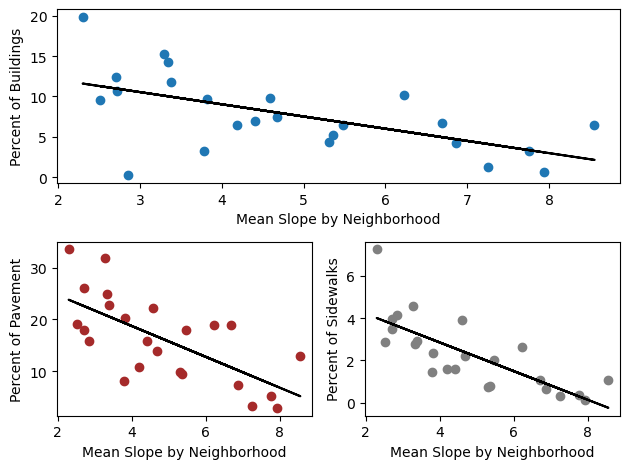

In [162]:
ax1=plt.subplot(211)
slope,intercept = np.polyfit(final3.MEAN,final3.Build_Pct,1)
ax1.scatter(final3.MEAN,final3.Build_Pct)
plt.plot(final3.MEAN,slope*final3.MEAN+intercept,color='k')
plt.xlabel('Mean Slope by Neighborhood')
plt.ylabel('Percent of Buildings')

ax2=plt.subplot(223)
slope2,intercept2 = np.polyfit(final3.MEAN,final3.Pave_Pct,1)
ax2.scatter(final3.MEAN,final3.Pave_Pct,color = 'brown')
plt.plot(final3.MEAN,slope2*final3.MEAN+intercept2,color='k')
plt.xlabel('Mean Slope by Neighborhood')
plt.ylabel('Percent of Pavement')

ax3=plt.subplot(224)
slope3,intercept3 = np.polyfit(final3.MEAN,final3.Side_Pct,1)
ax3.scatter(final3.MEAN,final3.Side_Pct,color = 'grey')
plt.plot(final3.MEAN,slope3*final3.MEAN+intercept3,color='k')
plt.xlabel('Mean Slope by Neighborhood')
plt.ylabel('Percent of Sidewalks')
plt.tight_layout()

In [163]:
print(slope,slope2,slope3)

-1.5089820348706948 -2.9791402543965293 -0.6776499213863362


### An analysis of slope:

#### I was unsurprised to see that the percentages of sidewalks, pavement, and buildings increased with the decreases in mean slope in each neighborhood.
#### Historically, it would have made sense that Blacksburg was primarily settled in a more flat-area. This means that the more developed areas (with higher percentages of buildings, sidewalks, and pavement) have generally lower slopes than other regions. Suburb communities such as Tom's Creek are hillier than the downtown regions, but have much less buildings, sidewalks, and pavement.

### Non-Hispanic-White Percentage

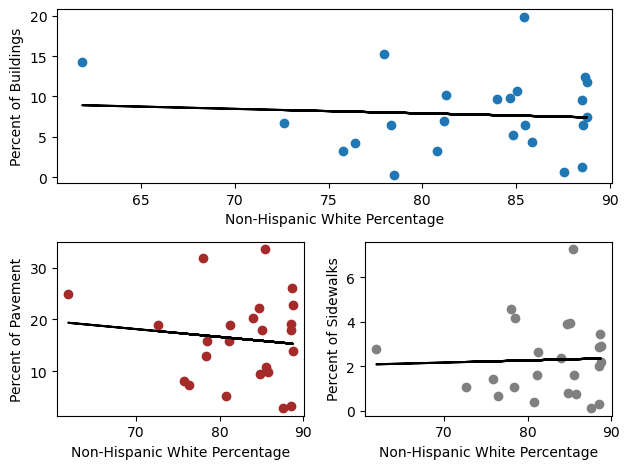

In [160]:
ax1=plt.subplot(211)
slope4,intercept = np.polyfit(final3.nonhispani,final3.Build_Pct,1)
ax1.scatter(final3.nonhispani,final3.Build_Pct)
plt.plot(final3.nonhispani,slope4*final3.nonhispani+intercept,color='k')
plt.xlabel('Non-Hispanic White Percentage')
plt.ylabel('Percent of Buildings')

ax2=plt.subplot(223)
slope5,intercept2 = np.polyfit(final3.nonhispani,final3.Pave_Pct,1)
ax2.scatter(final3.nonhispani,final3.Pave_Pct,color = 'brown')
plt.plot(final3.nonhispani,slope5*final3.nonhispani+intercept2,color='k')
plt.xlabel('Non-Hispanic White Percentage')
plt.ylabel('Percent of Pavement')

ax3=plt.subplot(224)
slope6,intercept3 = np.polyfit(final3.nonhispani,final3.Side_Pct,1)
ax3.scatter(final3.nonhispani,final3.Side_Pct,color = 'grey')
plt.plot(final3.nonhispani,slope6*final3.nonhispani+intercept3,color='k')
plt.xlabel('Non-Hispanic White Percentage')
plt.ylabel('Percent of Sidewalks')
plt.tight_layout()

In [164]:
print(slope4,slope5,slope6)

-0.05563850086233311 -0.15033490051566825 0.009707327660235026


### An analysis of Non-Hispanic white Percentage:
* Buildings and Pavement slightly decrease with respect to Non-Hispanic White Percentage.
* Sidewalks slightly INcrease with respect to non-hispanic white percentage.

#### Again, this perfectly fits my thought process. I assumed that generally, wealthier, priviledged, and more white neighborhoods would have less buildings and thus less pavement. On the other hand, I assumed that sidewalks would be slightly different, as generally rural populations (which are more white) would tend to have a higher percentage of sidewalks on each road. This conforms with the data, as we see a very slight increase of sidewalks in more-white neighborhoods.